# Perform clustering (DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Use double backslashes
df = pd.read_excel("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\Book1.xlsx")
df


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

<Axes: >

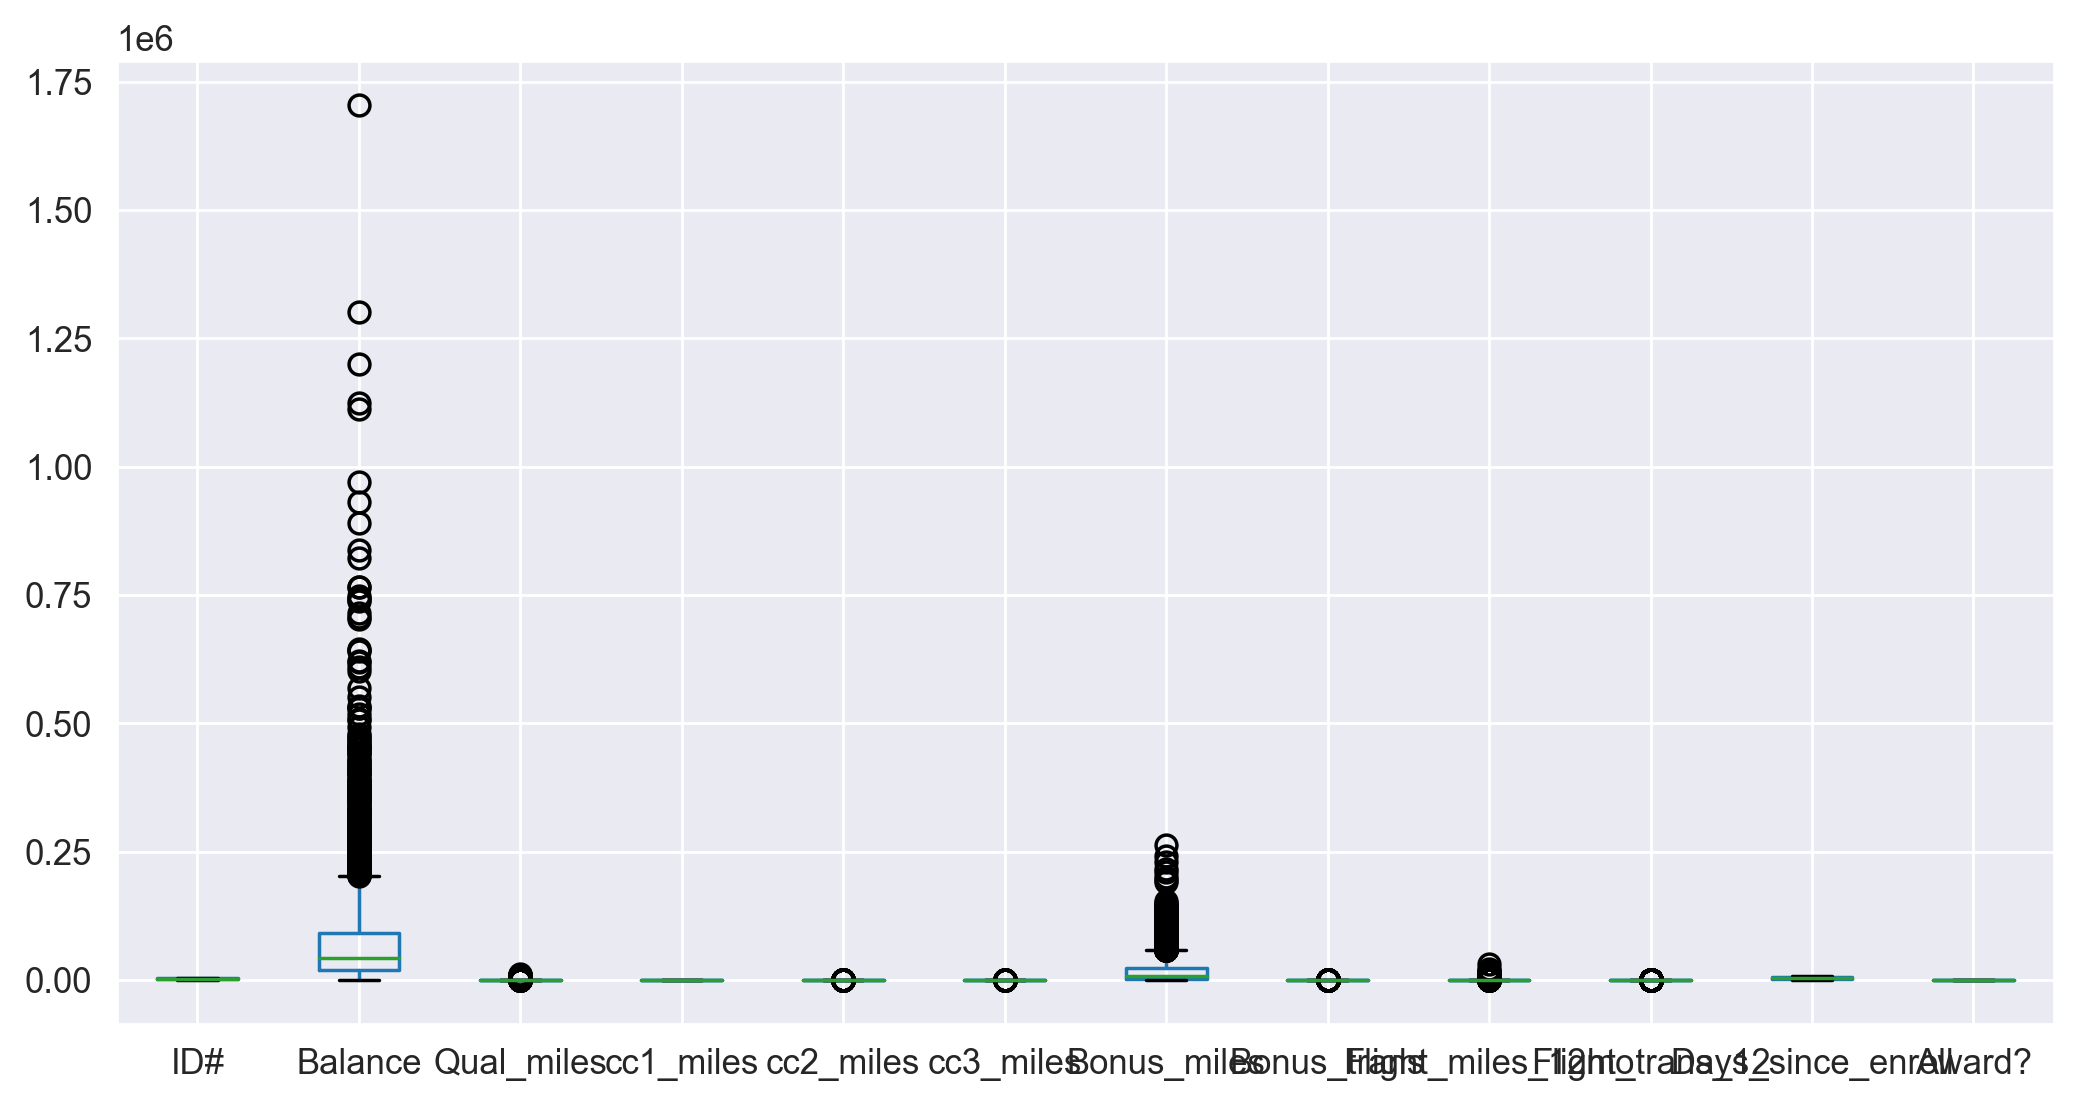

In [5]:
df.boxplot()

In [6]:
sns.pairplot(df)

In [7]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [8]:
outlier_detection(df,'Balance')

(-92287.25, 203218.75)

In [9]:
df[df['Balance']>203218.75]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
24      25   205651         500          1          1          1         4025   
32      33   276571           0          4          1          1        42044   
43      44   619393           0          3          1          1        15008   
45      46   288865         967          1          1          1        23600   
...    ...      ...         ...        ...        ...        ...          ...   
3754  3777   221543           0          1          1          1        10300   
3756  3779   203353           0          1          1          1        14000   
3772  3795   822321           0          5          1          1       138334   
3788  3811   374613           0          1          2          1        23592   
3839  3862   204693           0          1          1          1         5159   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
24             21                700                4               7932   
32             23                  0                0               7872   
43             14                  0                0               7819   
45             14               2000                4               6884   
...           ...                ...              ...                ...   
3754            5                200                3               3554   
3756           13               4000                8               3557   
3772           26                600                2               3288   
3788           31               5000               14               3463   
3839            5                  0                0               1672   

      Award?  
8          1  
24         0  
32         0  
43         1  
45         1  
...      ...  
3754       1  
3756       1  
3772       1  
3788       1  
3839       0  

[266 rows x 12 columns]

In [10]:
df.loc[df['Balance']>203218.75,'Balance'] =203218.75

In [11]:
outlier_detection(df,'Qual_miles')

(0.0, 0.0)

In [12]:
df[df['Qual_miles']>0.0]

ID#    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
21      22  185681.00        2024          1          1          1   
24      25  203218.75         500          1          1          1   
45      46  203218.75         967          1          1          1   
70      72   84409.00        5031          2          1          1   
100    103   25076.00        1182          5          1          1   
...    ...        ...         ...        ...        ...        ...   
3902  3925   13004.00        1000          1          1          1   
3911  3934   55922.00        2273          1          1          1   
3953  3976   59927.00         739          1          1          1   
3956  3979   47301.00        1005          1          1          1   
3961  3984  131125.00         862          1          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
21          13300           16               1800                9   
24           4025           21                700                4   
45          23600           14               2000                4   
70          15436           16               1150                4   
100         57203           14                  0                0   
...           ...          ...                ...              ...   
3902        13890           39                  0                0   
3911         8104           19               4104               16   
3953         3100            3                  0                0   
3956         4561            4                  0                0   
3961         4993           11                 50                1   

      Days_since_enroll  Award?  
21                 6896       1  
24                 7932       0  
45                 6884       1  
70                 7766       0  
100                6750       1  
...                 ...     ...  
3902               1572       1  
3911               1552       0  
3953               1464       1  
3956               1464       0  
3961               1443       0  

[226 rows x 12 columns]

In [13]:
df.loc[df['Qual_miles']>0.0,'Qual_miles'] =0.0

In [14]:
df[df['Qual_miles']<1.0]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0           0          1          1          1          174   
1        2  19244.0           0          1          1          1          215   
2        3  41354.0           0          1          1          1         4123   
3        4  14776.0           0          1          1          1          500   
4        5  97752.0           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0           0          1          1          1         8525   
3995  4018  64385.0           0          1          1          1          981   
3996  4019  73597.0           0          3          1          1        25447   
3997  4020  54899.0           0          1          1          1          500   
3998  4021   3016.0           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [15]:
df.loc[df['Qual_miles']<1.0,'Qual_miles'] =1.0

In [16]:
outlier_detection(df,'Bonus_miles')

(-32575.75, 57626.25)

In [17]:
df[df['Bonus_miles']>57626.25]

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
11      12   96522.0           1          5          1          1   
20      21  120576.0           1          5          1          1   
79      82   38896.0           1          5          1          1   
85      88   35418.0           1          5          1          1   
94      97  185549.0           1          5          1          1   
...    ...       ...         ...        ...        ...        ...   
3822  3845  166638.0           1          5          1          1   
3846  3869   97510.0           1          5          1          1   
3855  3878  190730.0           1          5          1          1   
3883  3906  126167.0           1          5          1          1   
3917  3940  130748.0           1          4          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
11          61105           19                  0                0   
20          58831           23                250                2   
79          76988           16                556                1   
85          58557           18                900                3   
94         110859           39               2950               16   
...           ...          ...                ...              ...   
3822        64572           22                  0                0   
3846        71609           51               7650               26   
3855        78916           28               2450                9   
3883       190160           15                  0                0   
3917        65510           37               6349                7   

      Days_since_enroll  Award?  
11                 6924       1  
20                 6896       1  
79                 7771       1  
85                 6813       1  
94                 6778       1  
...                 ...     ...  
3822               1697       0  
3846               1665       1  
3855               1648       1  
3883               1612       1  
3917               1545       0  

[280 rows x 12 columns]

In [18]:
df.loc[df['Bonus_miles']>57626.25,'Bonus_miles'] =57626.25

In [19]:
outlier_detection(df,'Bonus_trans')

(-18.0, 38.0)

In [20]:
df[df['Bonus_trans']>38.0]

ID#    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
8        9  203218.75           1          3          2          1   
65      66   53914.00           1          3          1          1   
94      97  185549.00           1          5          1          1   
121    124  203218.75           1          5          1          1   
127    130  203218.75           1          4          1          1   
...    ...        ...         ...        ...        ...        ...   
3594  3617   27619.00           1          4          1          1   
3837  3860    8150.00           1          1          2          1   
3846  3869   97510.00           1          5          1          1   
3902  3925   13004.00           1          1          1          1   
3974  3997   58387.00           1          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
8         1753.00           43               3850               12   
65       33767.00           45               5550               29   
94       57626.25           39               2950               16   
121      57626.25           45               2250               10   
127      56308.00           41               5200               14   
...           ...          ...                ...              ...   
3594     57626.25           68              14050               46   
3837     14135.00           41                500                2   
3846     57626.25           51               7650               26   
3902     13890.00           39                  0                0   
3974     14581.00           39                  0                0   

      Days_since_enroll  Award?  
8                  6948       1  
65                 6826       1  
94                 6778       1  
121                7668       1  
127                7645       1  
...                 ...     ...  
3594               1325       1  
3837               1676       1  
3846               1665       1  
3902               1572       1  
3974               1435       0  

[63 rows x 12 columns]

In [21]:
df.loc[df['Bonus_trans']>38.0,'Bonus_trans'] =38.0

In [22]:
df[df['Flight_miles_12mo']>777.5]

ID#    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
4        5   97752.00           1          4          1          1   
8        9  203218.75           1          3          2          1   
9       10  104860.00           1          3          1          1   
21      22  185681.00           1          1          1          1   
22      23   20584.00           1          1          1          1   
...    ...        ...         ...        ...        ...        ...   
3934  3957   76595.00           1          1          1          1   
3946  3969  139032.00           1          3          1          1   
3950  3973   59650.00           1          1          1          1   
3967  3990   26504.00           1          2          1          1   
3979  4002   57793.00           1          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
4         43300.0           26               2077                4   
8          1753.0           38               3850               12   
9         28426.0           28               1150                3   
21        13300.0           16               1800                9   
22         3450.0           11               3450               11   
...           ...          ...                ...              ...   
3934      10577.0            2               9577                1   
3946      19565.0           17               1150                4   
3950       5050.0           16               3950               13   
3967      10599.0           29               1000                7   
3979      20959.0           15               1198                3   

      Days_since_enroll  Award?  
4                  6935       1  
8                  6948       1  
9                  6931       1  
21                 6896       1  
22                 6884       0  
...                 ...     ...  
3934               1515       0  
3946               1481       0  
3950               1476       0  
3967               1445       0  
3979               1424       1  

[569 rows x 12 columns]

In [23]:
df.loc[df['Flight_miles_12mo']>777.5,'Flight_miles_12mo'] =777.5

In [24]:
outlier_detection(df,'cc3_miles')

(1.0, 1.0)

In [25]:
df[df['cc3_miles']>1.0]

ID#    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
106    109   96627.00           1          1          1          3   
343    348  112501.00           1          1          1          2   
384    389   28193.00           1          5          1          4   
850    861   25629.00           1          4          1          5   
904    915   15835.00           1          2          1          5   
1036  1047  154664.00           1          4          1          3   
1244  1257  166465.00           1          4          1          4   
1300  1313  203218.75           1          3          1          4   
1878  1895  128302.00           1          5          1          4   
1917  1934   82981.00           1          5          1          3   
1946  1963  126873.00           1          4          1          5   
2251  2269  125679.00           1          3          1          4   
2283  2301  128456.00           1          5          1          3   
2364  2382  108081.00           1          5          1          5   
2853  2875   66466.00           1          4          1          2   
2955  2977   61474.00           1          1          1          4   
3146  3168   89237.00           1          4          1          2   
3338  3361   84148.00           1          1          1          5   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
106      49059.00           26              777.5                9   
343      19140.00           11                0.0                0   
384      57626.25           32                0.0                0   
850      57626.25           36              600.0                2   
904      57626.25           16                0.0                0   
1036     57626.25           33                0.0                0   
1244     57626.25           30                0.0                0   
1300     43993.00           38              777.5                7   
1878     57626.25           32              400.0                2   
1917     57626.25           38              777.5                2   
1946     57626.25           32              500.0                1   
2251     57626.25           27              650.0                1   
2283     57626.25           28                0.0                0   
2364     57626.25           24                0.0                0   
2853     57626.25           22                0.0                0   
2955     47717.00           14                0.0                0   
3146     37668.00           18                0.0                0   
3338     57626.25            7                0.0                0   

      Days_since_enroll  Award?  
106                6738       1  
343                7101       0  
384                6980       1  
850                5966       1  
904                5825       1  
1036               5769       0  
1244               5531       0  
1300               5030       0  
1878               4103       1  
1917               3964       1  
1946               3880       1  
2251               3683       0  
2283               3764       0  
2364               3567       1  
2853               1956       1  
2955               3354       0  
3146               2533       0  
3338               1054       0

In [26]:
df.loc[df['cc3_miles']>1.0,'cc3_miles'] =1.0

In [27]:
df.loc[df['cc3_miles']>1.0,'cc3_miles'] =1.0

<Axes: >

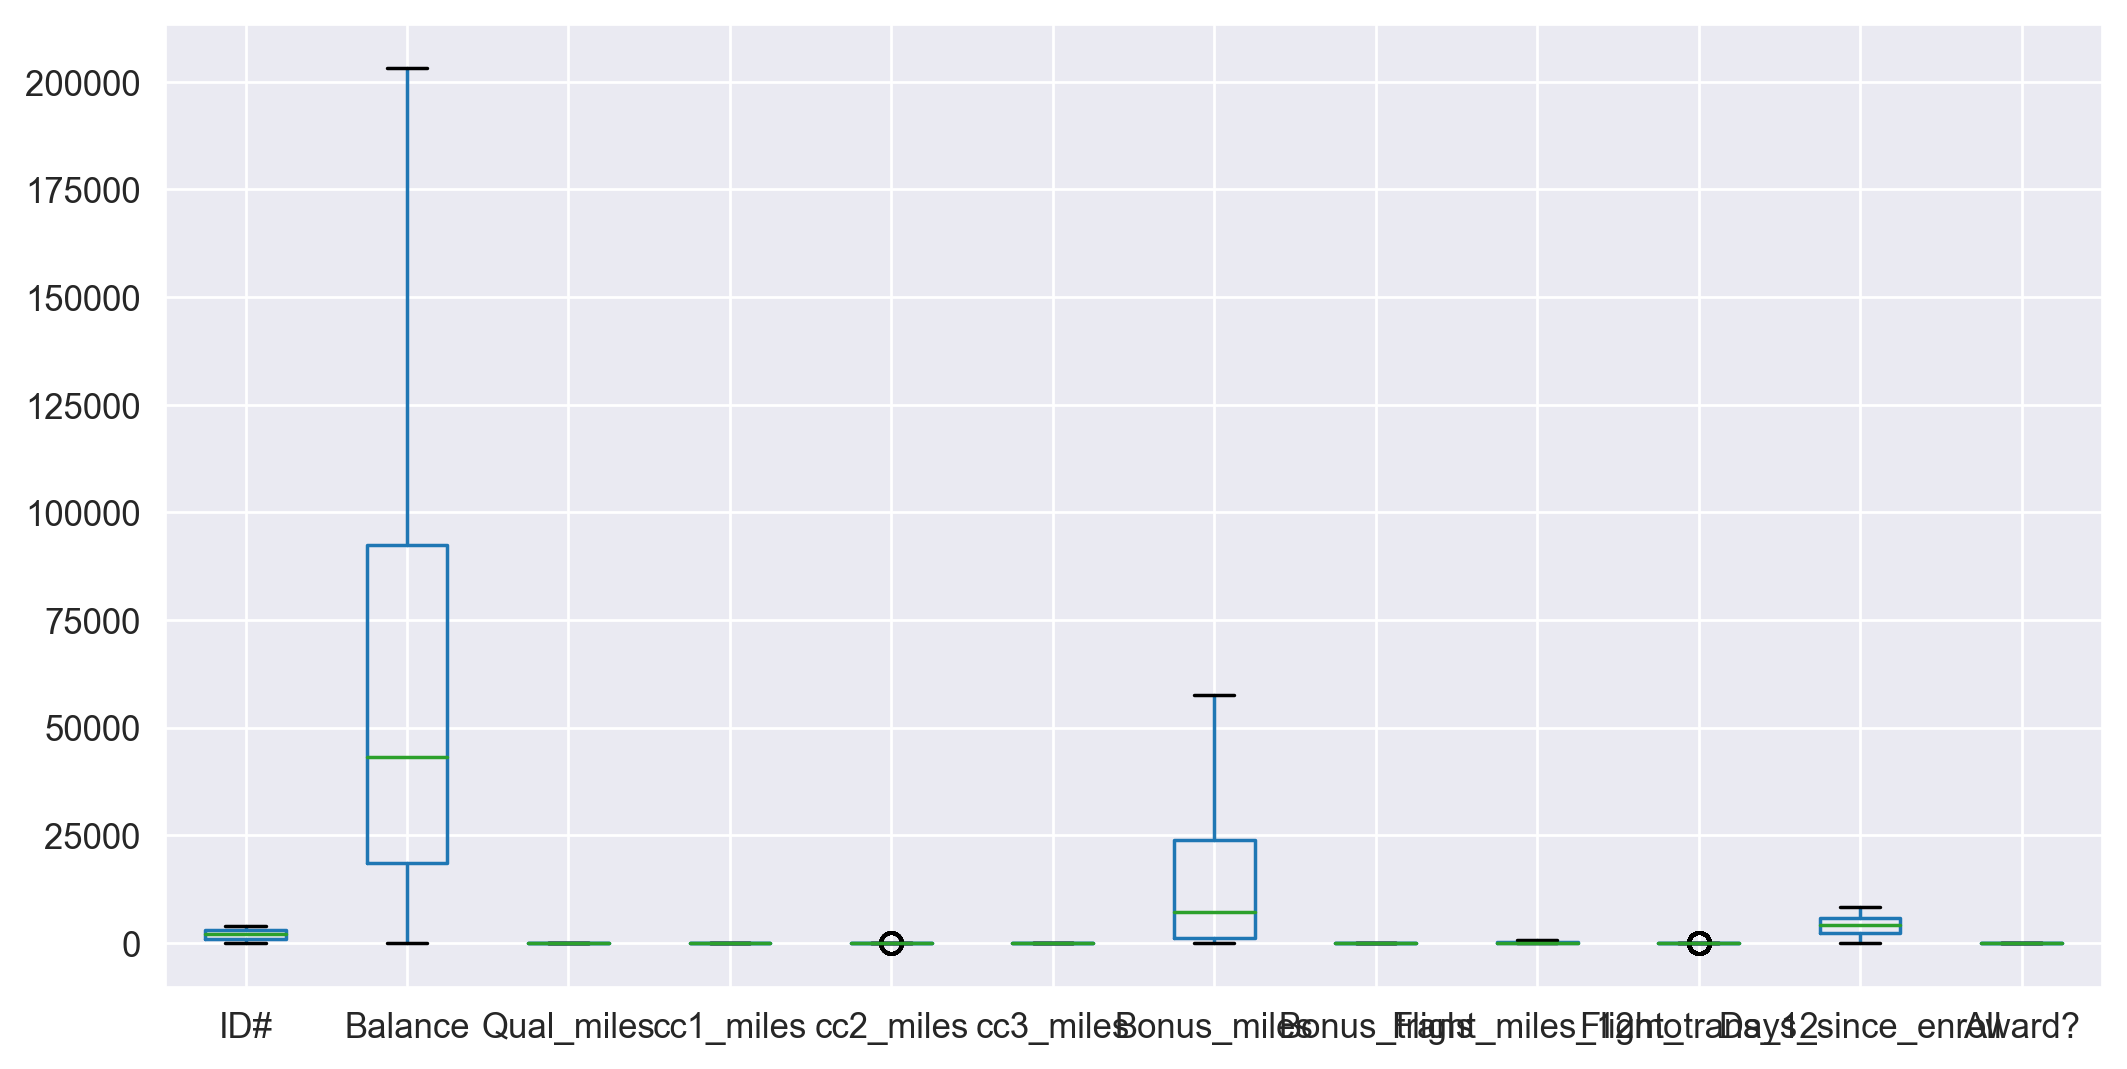

In [29]:
df.boxplot()

In [28]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503, -0.60725829,  0.        , ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.36216787,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [31]:
#Model Building

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([ 0,  0,  0, ..., 92, 84,  0], dtype=int64)

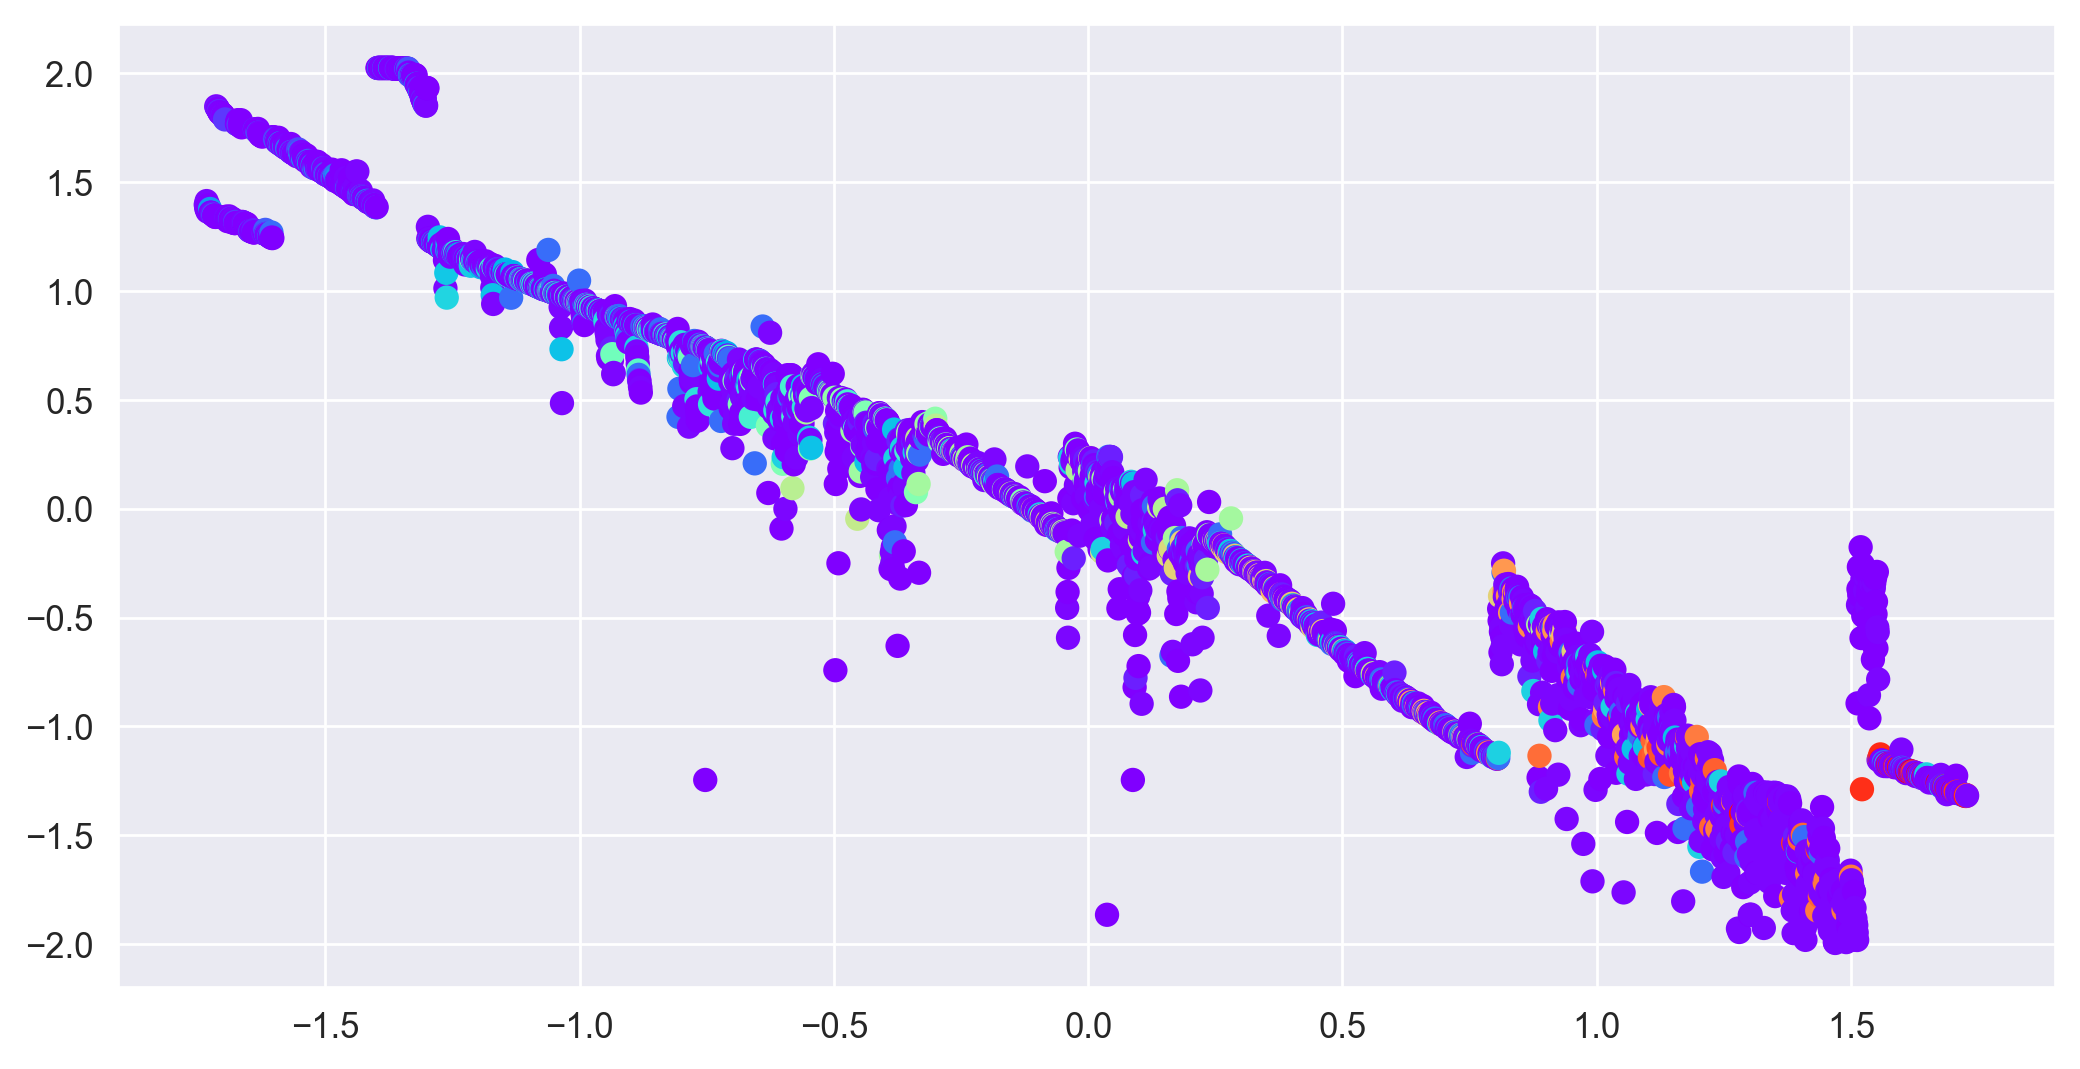

In [34]:
plt.scatter(x[:,0],x[:,10],c = y,cmap = 'rainbow')

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

-0.34217608705160174

In [36]:
#Hyperparameter tuning

In [37]:
from sklearn.neighbors import NearestNeighbors

In [38]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [39]:
d,index = neigh.kneighbors(x)

In [40]:
d

array([[0.        , 0.18786764, 0.21469982],
       [0.        , 0.134725  , 0.18786764],
       [0.        , 0.23361242, 0.36010907],
       ...,
       [0.        , 0.2550823 , 0.37607587],
       [0.        , 0.48487137, 0.65876427],
       [0.        , 0.03911926, 0.10499643]])

In [41]:
distance = np.sort(d[:,1])
distance

array([3.42801916e-03, 3.42801916e-03, 3.56389871e-03, ...,
       3.98968573e+00, 4.01053938e+00, 4.02886662e+00])

Text(0.5, 1.0, 'K-Distance Graph')

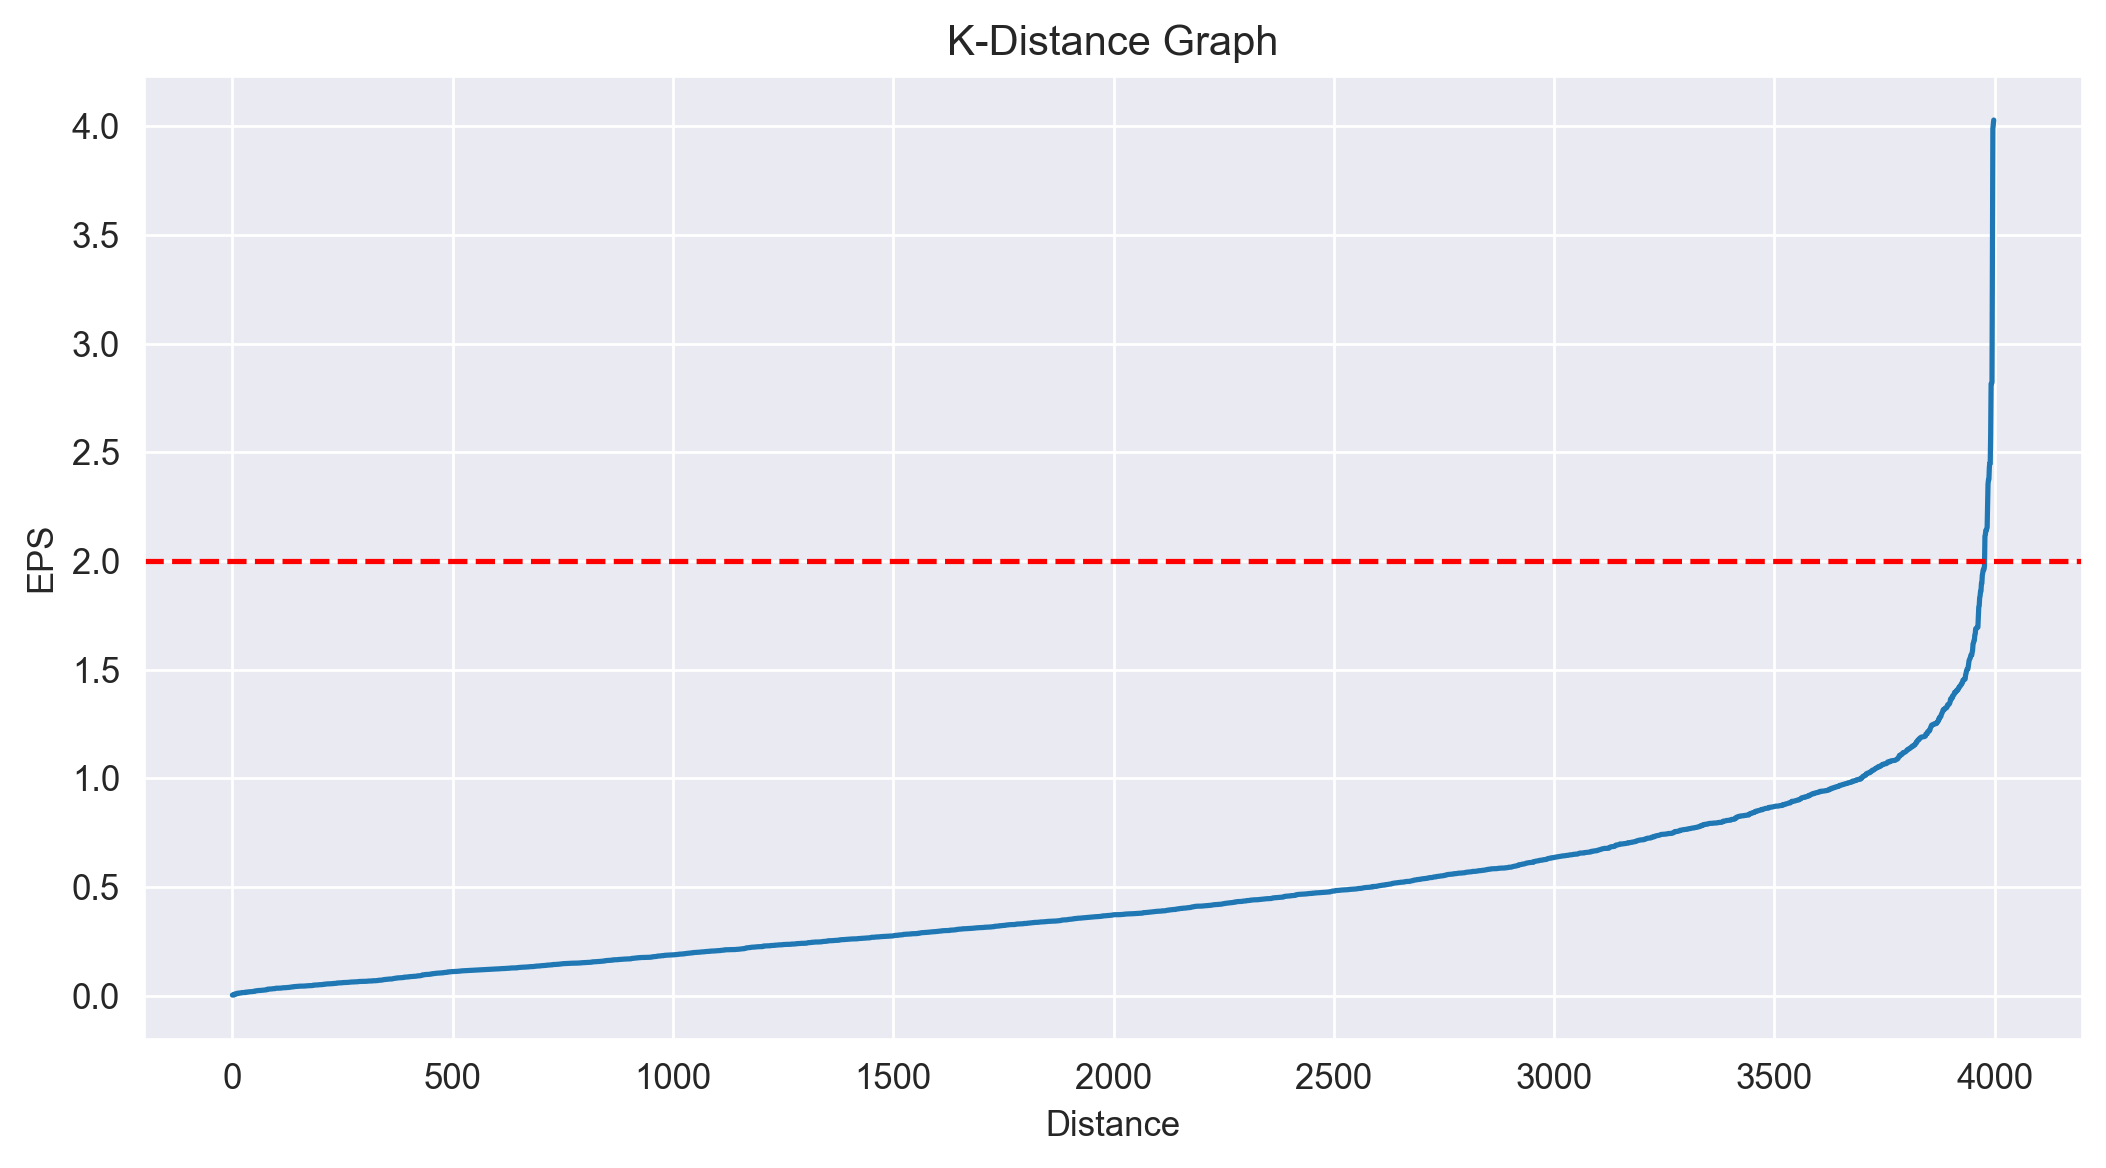

In [42]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

# Evaluate the model

In [43]:
db = DBSCAN(eps=2,min_samples=3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

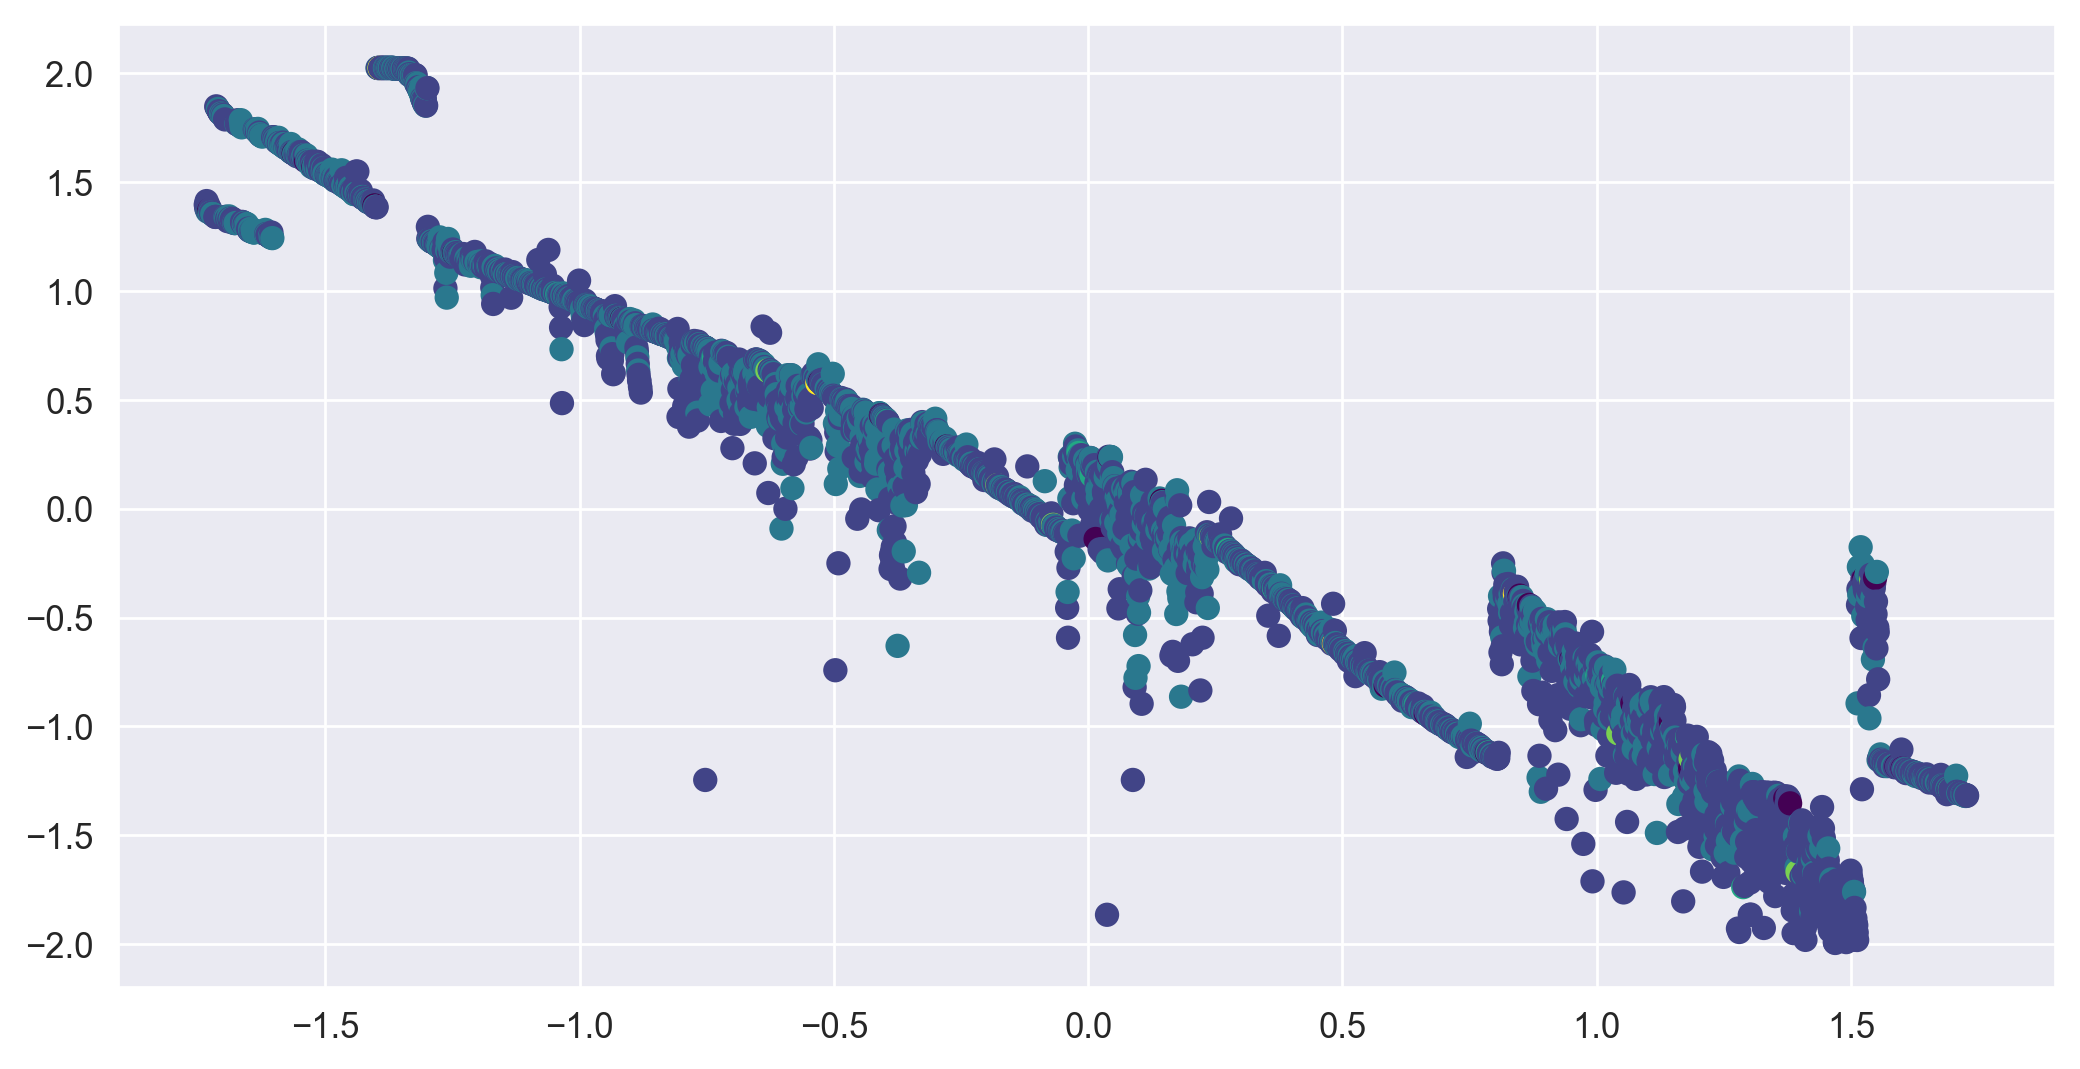

In [52]:
plt.scatter(x[:,0],x[:,10],c = yp, cmap='viridis')

In [53]:
silhouette_score(x,yp)

0.2210518478934291

In [46]:
#Analyze the clusters

In [47]:
df['Cluster'] = yp
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0           1          1          1          1        174.0   
1        2  19244.0           1          1          1          1        215.0   
2        3  41354.0           1          1          1          1       4123.0   
3        4  14776.0           1          1          1          1        500.0   
4        5  97752.0           1          4          1          1      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0           1          1          1          1       8525.0   
3995  4018  64385.0           1          1          1          1        981.0   
3996  4019  73597.0           1          3          1          1      25447.0   
3997  4020  54899.0           1          1          1          1        500.0   
3998  4021   3016.0           1          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                0.0                0               7000   
1               2                0.0                0               6968   
2               4                0.0                0               7034   
3               1                0.0                0               6952   
4              26              777.5                4               6935   
...           ...                ...              ...                ...   
3994            4              200.0                1               1403   
3995            5                0.0                0               1395   
3996            8                0.0                0               1402   
3997            1              500.0                1               1401   
3998            0                0.0                0               1398   

      Award?  Cluster  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          1        1  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        0  

[3999 rows x 13 columns]

In [48]:
df[df['Cluster'] == 1]

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
4        5   97752.0           1          4          1          1   
7        8   20856.0           1          1          1          1   
9       10  104860.0           1          3          1          1   
11      12   96522.0           1          5          1          1   
15      16   28495.0           1          4          1          1   
...    ...       ...         ...        ...        ...        ...   
3987  4010   11933.0           1          1          1          1   
3989  4012    2622.0           1          1          1          1   
3994  4017   18476.0           1          1          1          1   
3995  4018   64385.0           1          1          1          1   
3996  4019   73597.0           1          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
4        43300.00           26              777.5                4   
7         5250.00            4              250.0                1   
9        28426.00           28              777.5                3   
11       57626.25           19                0.0                0   
15       49442.00           15                0.0                0   
...           ...          ...                ...              ...   
3987       249.00            3               79.0                1   
3989      1625.00            6                0.0                0   
3994      8525.00            4              200.0                1   
3995       981.00            5                0.0                0   
3996     25447.00            8                0.0                0   

      Days_since_enroll  Award?  Cluster  
4                  6935       1        1  
7                  6938       1        1  
9                  6931       1        1  
11                 6924       1        1  
15                 6912       1        1  
...                 ...     ...      ...  
3987               1412       1        1  
3989               1404       1        1  
3994               1403       1        1  
3995               1395       1        1  
3996               1402       1        1  

[1456 rows x 13 columns]

In [49]:
df.groupby('Cluster').agg('mean')

ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                
-1       2246.241379  92624.991379         1.0   1.620690   1.827586   
 0       2170.313505  56103.513163         1.0   1.710209   1.000000   
 1       1736.526099  76793.962912         1.0   2.684066   1.000000   
 2       2519.071429  39599.000000         1.0   1.000000   2.000000   
 3       2671.625000  36524.250000         1.0   1.000000   3.000000   
 4       1840.000000  20129.750000         1.0   1.000000   2.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
-1             1.0  26821.465517    28.344828         577.862069   
 0             1.0   9889.261154     9.023714         111.095056   
 1             1.0  24698.109032    15.278846         287.178571   
 2             1.0   9068.928571    12.714286          25.000000   
 3             1.0  15518.500000    14.500000          50.000000   
 4             1.0   8412.000000    14.500000           0.000000   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
-1             14.655172        3996.689655  0.724138  
 0              0.627010        3824.518087  0.000000  
 1              2.405907        4634.454670  1.000000  
 2              0.214286        3275.214286  0.000000  
 3              0.250000        3179.625000  0.000000  
 4              0.000000        4939.500000  1.000000